<a href="https://colab.research.google.com/github/SummerLife/Embedded-ML/blob/master/project/09_minist_numpy/minist_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from mnist import load_mnist
import numpy as np
from PIL import Image
import pickle

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [24]:
x_train.shape, t_train, t_train.shape, x_test.shape, x_test.shape, t_test, t_test.shape

((60000, 784),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 (60000,),
 (10000, 784),
 (10000, 784),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 (10000,))

In [25]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [26]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [27]:
print(img.shape)

(784,)


In [28]:
img = img.reshape(28, 28)

In [29]:
img.shape

(28, 28)

In [30]:
img_show(img)

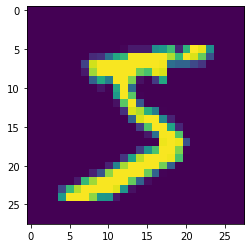

In [31]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [33]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # handle overflow
    return np.exp(x) / np.sum(np.exp(x))

In [34]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [35]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

In [36]:
def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [37]:
x, t = get_data()

In [38]:
network = init_network()

In [39]:
accuracy_cnt = 0

In [40]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # gets the index of the element with the highest probability
    if p == t[i]:
        accuracy_cnt += 1

print(accuracy_cnt)
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

9352
Accuracy:0.9352


In [41]:
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

In [42]:
x.shape

(10000, 784)

In [43]:
x[0].shape

(784,)

In [44]:
W1.shape

(784, 50)

In [45]:
W2.shape

(50, 100)

In [46]:
W3.shape

(100, 10)

In [53]:
x, t = get_data()
network = init_network()

batch_size = 2000
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    print(i)
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    print(p)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


0
[7 2 1 ... 3 9 5]
2000
[6 5 6 ... 7 4 9]
4000
[4 4 3 ... 5 1 7]
6000
[9 8 6 ... 5 7 8]
8000
[4 9 9 ... 4 5 6]
Accuracy:0.9352


In [66]:
x = np.array([[0.1,0.8,0.1], [0.3,0.1,0.6], [0.2,0.5,0.3], [0.7,0.2,0.1]])

In [67]:
np.argmax(x, axis=1)

array([1, 2, 1, 0])

In [68]:
np.argmax(x, axis=0)

array([3, 0, 1])

In [70]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])

In [71]:
print(y==t)

[ True  True False  True]


In [72]:
np.sum(y==t)

3